### Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1- Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) <br>
2 - Plot bar charts showing impact of employee salaries on retention<br>
3 - Plot bar charts showing corelation between department and employee retention<br>
4 - Now build logistic regression model using variables that were narrowed down in step 1<br>
5 -Measure the accuracy of the model

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
%matplotlib notebook
import joblib
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Exploaring the data

In [2]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [7]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
df.groupby("Department").sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [9]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [10]:
df.groupby(["left","salary","Department"]).max()

satisfaction_level  last_evaluation  number_project  \
left salary Department                                                         
0    high   IT                         0.99             0.97               6   
            RandD                      0.97             0.95               6   
            accounting                 0.97             1.00               6   
            hr                         0.99             0.99               6   
            management                 0.98             1.00               6   
            marketing                  1.00             1.00               6   
            product_mng                0.99             0.98               6   
            sales                      1.00             0.99               6   
            support                    0.99             1.00               6   
            technical                  1.00             1.00               6   
     low    IT                         1.00             1.00               6   
            RandD                      1.00             1.00               6   
            accounting                 1.00             1.00               6   
            hr                         1.00             0.99               6   
            management                 1.00             1.00               6   
            marketing                  0.99             1.00               6   
            product_mng                1.00             1.00               6   
            sales                      1.00             1.00               6   
            support                    1.00             1.00               6   
            technical                  1.00             1.00               6   
     medium IT                         1.00             1.00               6   
            RandD                      1.00             1.00               6   
            accounting                 1.00             1.00               6   
            hr                         1.00             1.00               6   
            management                 1.00             1.00               6   
            marketing                  1.00             1.00               6   
            product_mng                1.00             1.00               6   
            sales                      1.00             1.00               6   
            support                    1.00             1.00               6   
            technical                  1.00             1.00               6   
1    high   IT                         0.75             0.99               5   
            RandD                      0.43             0.95               5   
            accounting                 0.42             0.97               6   
            hr                         0.45             0.85               6   
            management                 0.42             0.97               6   
            marketing                  0.45             0.57               2   
            product_mng                0.45             0.91               6   
            sales                      0.90             0.95               7   
            support                    0.83             0.99               6   
            technical                  0.80             0.89               6   
     low    IT                         0.92             1.00               7   
            RandD                      0.89             1.00               7   
            accounting                 0.90             1.00               7   
            hr                         0.91             1.00               7   
            management                 0.90             1.00               7   
            marketing                  0.90             1.00               7   
            product_mng                0.91             1.00               7   
            sales                      0.92             1.00               7   
            support      

In [11]:
df.groupby(["left","salary","Department"]).sum()

satisfaction_level  last_evaluation  number_project  \
left salary Department                                                         
0    high   IT                        50.64            56.62             307   
            RandD                     28.53            33.32             181   
            accounting                43.83            50.71             275   
            hr                        28.70            29.52             151   
            management               146.58           160.09             844   
            marketing                 44.61            48.38             256   
            product_mng               39.80            41.48             232   
            sales                    168.31           177.43             971   
            support                   88.10            95.17             506   
            technical                113.82           125.72             654   
     low    IT                       297.88           311.07            1636   
            RandD                    201.25           219.90            1172   
            accounting               166.61           188.22             983   
            hr                       160.03           176.59             909   
            management                82.34            87.68             460   
            marketing                186.53           203.41            1042   
            product_mng              229.02           248.60            1296   
            sales                    938.45           992.36            5301   
            support                  509.79           545.61            2863   
            technical                664.82           714.95            3806   
     medium IT                       297.50           312.56            1641   
            RandD                    205.65           217.03            1193   
            accounting               153.94           169.88             886   
            hr                       160.61           171.59             880   
            management               124.05           142.17             751   
            marketing                207.63           221.96            1139   
            product_mng              194.74           210.77            1144   
            sales                    983.12          1047.24            5573   
            support                  530.05           567.37            2965   
            technical                573.37           609.03            3257   
1    high   IT                         2.33             2.86              14   
            RandD                      1.39             2.41              11   
            accounting                 1.61             2.91              14   
            hr                         1.59             3.95              24   
            management                 0.42             0.97               6   
            marketing                  3.81             4.71              18   
            product_mng                1.96             3.79              20   
            sales                      6.26            10.82              67   
            support                    4.26             5.52              29   
            technical                 12.00            14.87              80   
     low    IT                        73.67           124.77             675   
            RandD                     25.86            40.06             213   
            accounting                38.94            67.35             378   
            hr                        43.87            63.88             328   
            management                27.59            40.63             220   
            marketing                 55.84            89.08             466   
            product_mng               51.01            78.75             429   
            sales                    322.71           496.35            2587   
            support      

In [12]:
df.groupby(["left","salary","Department"]).mean()

satisfaction_level  last_evaluation  number_project  \
left salary Department                                                         
0    high   IT                     0.641013         0.716709        3.886076   
            RandD                  0.607021         0.708936        3.851064   
            accounting             0.635217         0.734928        3.985507   
            hr                     0.735897         0.756923        3.871795   
            management             0.654375         0.714688        3.767857   
            marketing              0.628310         0.681408        3.605634   
            product_mng            0.641935         0.669032        3.741935   
            sales                  0.660039         0.695804        3.807843   
            support                0.662406         0.715564        3.804511   
            technical              0.646705         0.714318        3.715909   
     low    IT                     0.681648         0.711831        3.743707   
            RandD                  0.651294         0.711650        3.792880   
            accounting             0.643282         0.726718        3.795367   
            hr                     0.658560         0.726708        3.740741   
            management             0.680496         0.724628        3.801653   
            marketing              0.675833         0.736993        3.775362   
            product_mng            0.661908         0.718497        3.745665   
            sales                  0.669365         0.707817        3.781027   
            support                0.673435         0.720753        3.782034   
            technical              0.668833         0.719266        3.828974   
     medium IT                     0.679224         0.713607        3.746575   
            RandD                  0.663387         0.700097        3.848387   
            accounting             0.655064         0.722894        3.770213   
            hr                     0.663678         0.709050        3.636364   
            management             0.639433         0.732835        3.871134   
            marketing              0.674123         0.720649        3.698052   
            product_mng            0.657905         0.712061        3.864865   
            sales                  0.669244         0.712893        3.793737   
            support                0.676084         0.723686        3.781888   
            technical              0.672181         0.713986        3.818288   
1    high   IT                     0.582500         0.715000        3.500000   
            RandD                  0.347500         0.602500        2.750000   
            accounting             0.322000         0.582000        2.800000   
            hr                     0.265000         0.658333        4.000000   
            management             0.420000         0.970000        6.000000   
            marketing              0.423333         0.523333        2.000000   
            product_mng            0.326667         0.631667        3.333333   
            sales                  0.447143         0.772857        4.785714   
            support                0.532500         0.690000        3.625000   
            technical              0.480000         0.594800        3.200000   
     low    IT                     0.428314         0.725407        3.924419   
            RandD                  0.470182         0.728364        3.872727   
            accounting             0.393333         0.680303        3.818182   
            hr                     0.476848         0.694348        3.565217   
            management             0.467627         0.688644        3.728814   
            marketing              0.443175         0.706984        3.698413   
            product_mng            0.485810         0.750000        4.085714   
            sales                  0.462999         0.712123        3.711621   
            support      

In [13]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


from the analysis can draw the conclusion:<br><br>
**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66) and got about 40% correlation with left employers<br>
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)<br>
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm<br>
**time_spend_company**: 15% correlated with left column, time spend (3.3) average hours employess working leaving the firm vs the retained ones (3.8) hours<br>
**work_accident**: with mean 18 who didn't leave the company and with only 0.04 mean who left the company so work accident defenitly not have direct or clear impact with left column because many pepole have work accident and didn't leave the firm<br>
**last_evaluation**: last_evaluation (0.71) in employees leaving the firm vs the retained ones (0.71) approximatly equal and approximatly 0% correlated with left column so there is no direct impact with left column<br>
**number of projects**: number of projects (3.7) in employees leaving the firm vs the retained ones (3.8) very close so there is no direct impact with left column


#### Visualization

<IPython.core.display.Javascript object>


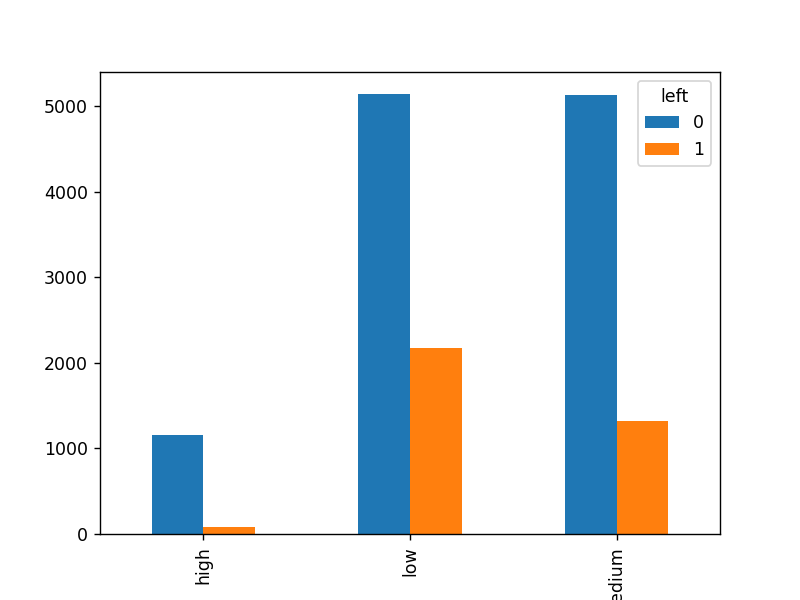

<AxesSubplot:xlabel='salary'>

In [14]:
pd.crosstab(df.salary , df.left).plot(kind="bar")

<IPython.core.display.Javascript object>


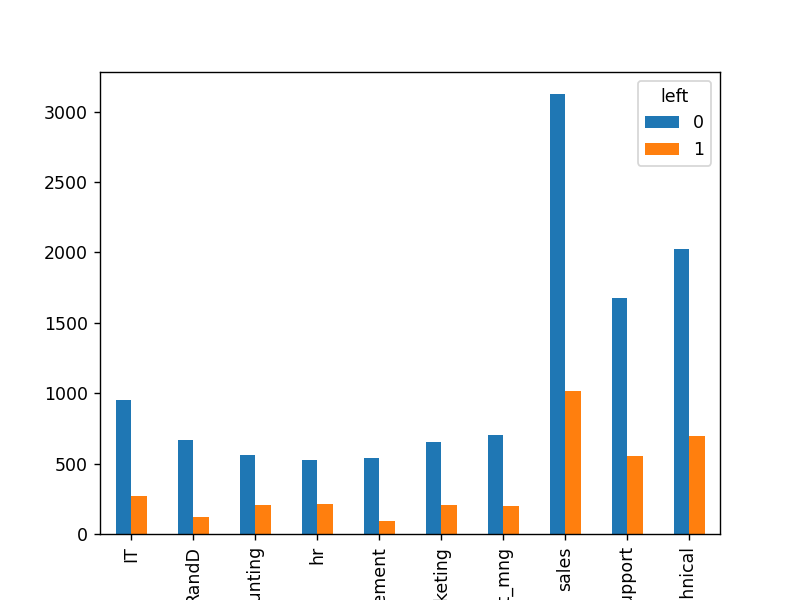

<AxesSubplot:xlabel='Department'>

In [15]:
pd.crosstab(df.Department ,df.left).plot(kind="bar")

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis<br>

From the data analysis so far we can conclude that we will use following variables as independant variables in our model:<br>
**Satisfaction_Level**<br>
**Average_Monthly_Hours**<br>
**Promotion_Last_5_Years**<br>
**Salary**<br>
**time_spend_company**

#### Assigning important Features

In [16]:
new= df.drop(["left","Work_accident"], axis=1)
new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,sales,low
1,0.80,0.86,5,262,6,0,sales,medium
2,0.11,0.88,7,272,4,0,sales,medium
3,0.72,0.87,5,223,5,0,sales,low
4,0.37,0.52,2,159,3,0,sales,low
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,support,low
14995,0.37,0.48,2,160,3,0,support,low
14996,0.37,0.53,2,143,3,0,support,low
14997,0.11,0.96,6,280,4,0,support,low


#### apply one hot encoder to salary column

In [17]:
dummy=pd.get_dummies(df.salary)
dummy

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


#### drop salary and one dummy column to avoid trapping in dummy variables trap

In [18]:
semi_final=pd.concat([new,dummy],axis=1)
semi_final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,support,low,0,1,0


In [19]:
final=semi_final.drop(["salary","medium"], axis=1)
final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,Department,high,low
0,0.38,0.53,2,157,3,0,sales,0,1
1,0.80,0.86,5,262,6,0,sales,0,0
2,0.11,0.88,7,272,4,0,sales,0,0
3,0.72,0.87,5,223,5,0,sales,0,1
4,0.37,0.52,2,159,3,0,sales,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,support,0,1
14995,0.37,0.48,2,160,3,0,support,0,1
14996,0.37,0.53,2,143,3,0,support,0,1
14997,0.11,0.96,6,280,4,0,support,0,1


In [20]:
final.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [21]:
final.replace(to_replace=["sales","accounting","hr","technical","support","management","IT","product_mng","marketing","RandD"], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)

#### Assigning Features and target columns

In [22]:
x=final
y=df.left

#### Split the model into training data and testing data

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15 ,random_state=7)

#### Bulding and Training Logistic Regression model

In [24]:
model=LogisticRegression()
model.fit(x,y)

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model.score(x_test,y_test)

0.772

#### Assign the parameters

In [26]:
theta_0 = model.intercept_
theta_1 = model.coef_[0][0]
theta_2 = model.coef_[0][1]
theta_3 = model.coef_[0][2]
theta_4 = model.coef_[0][3]
theta_5 = model.coef_[0][4]
theta_6 = model.coef_[0][5]

print(f"theta_0 = {theta_0}\ntheta_1 = {theta_1}\ntheta_2 = {theta_2}\ntheta_3 = {theta_3}\ntheta_4 = {theta_4}\ntheta_5 = {theta_5}\ntheta_6 = {theta_6}")

theta_0 = [0.02221887]
theta_1 = -4.1183034058115355
theta_2 = 0.6155000682691014
theta_3 = -0.308957195363807
theta_4 = 0.004416920779873931
theta_5 = 0.23958451059970445
theta_6 = -0.8079336140461716


#### define sigmoid function

In [27]:
from math import e,pow
def sigmoid_fun(x1,x2,x3,x4,x5,x6):
    return 1 / (1 + pow(e, -(theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3 + theta_4 * x4 + theta_5 * x5 + theta_6 * x6)))

#### save the model

In [29]:
joblib.dump(model, "predict  of employees to leave the company")

['predict  of employees to leave the company']

#### load the model

In [30]:
joblib.load("predict  of employees to leave the company")

LogisticRegression()